<a href="https://colab.research.google.com/github/wel51x/DS-Unit-4-Sprint-2-NLP/blob/master/My_LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [1]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4.1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [33]:
%%time
##### Your Code Here #####
import requests
from bs4 import BeautifulSoup

home_url = "https://www.indeed.com/jobs?" + "q=Data+Scientist"
items = []
for i in range(10):
  url = home_url + '&start=' + str(i * 10)
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')
  items.extend([summary.text for summary in soup.findAll(class_='summary')])
listings = list(set(items))
print(len(listings), "Data Scientist jobs")

106 Data Scientist jobs
CPU times: user 1.35 s, sys: 24.9 ms, total: 1.38 s
Wall time: 5.77 s


In [0]:
listings

## 2) Use NLTK to tokenize / clean the listings 

In [0]:
##### Your Code Here #####
stop_words = stopwords.words('english')

punctuation = str.maketrans('', '', string.punctuation)
jobs = [listing.translate(punctuation) for listing in listings]

tokens = [word_tokenize(job) for job in jobs]

In [0]:
tokens

In [0]:
tokenz = []
for job in jobs:
  tokenz += word_tokenize(job)


In [0]:
tokenz

In [40]:
(len(tokens), len(tokenz))

(106, 2650)

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [62]:
text = lemmatized_job_listings
# Instantiate vectorizer object
vectorizer = CountVectorizer()
# Create a vocabulary and get word counts per document
bag_of_words = vectorizer.fit_transform(listings)
# Print word counts
print(bag_of_words.toarray())

# Get feature names to use as dataframe column headers
feature_names = vectorizer.get_feature_names()

df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
df.head()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,800,ability,able,academic,access,accumulation,accurate,achieve,acquire,across,...,work,workflow,working,works,workstreams,world,would,years,you,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

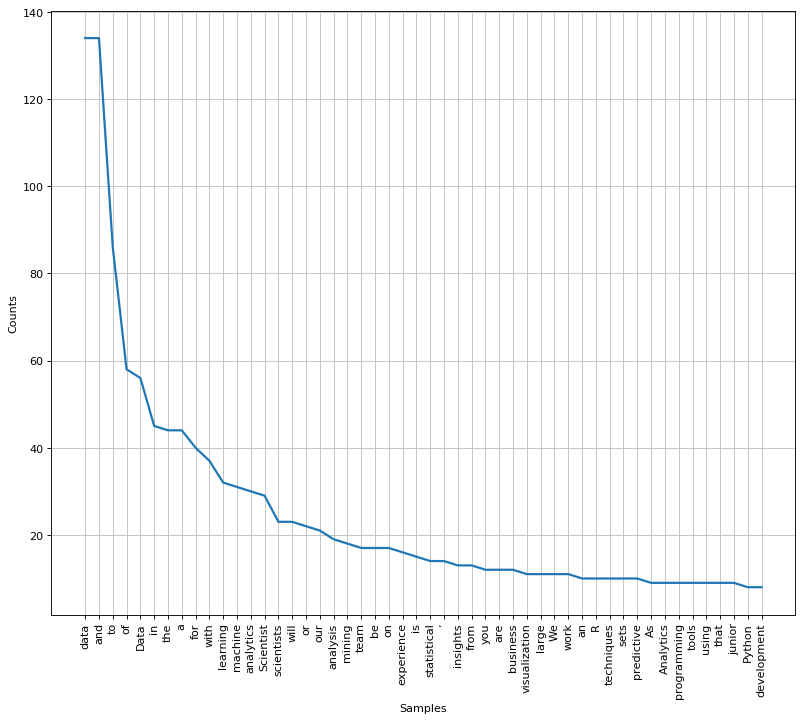

In [57]:
##### Your Code Here #####
fdist = FreqDist(tokenz)

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
fdist.plot(50,cumulative=False)
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
##### Your Code Here #####
# fuck this I give up

## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.